In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
def knapSack(W, wt, val, n):
    K = [[0 for x in range(W+1)] for x in range(n+1)]
    for i in range(n+1):
        #if (i%1000 == 0):
            #print i
        for w in range(W+1):
            if i==0 or w==0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
    return K

def getUsedItems(w,c):
    #print 'Called'
    i = (c.shape[1])-1
    currentW =  (c.shape[0])-1
    marked = []
    for i in range(i+1):
        marked.append(0)
    while (i > 0 and currentW >=0):
        if (i==0 and c.iloc[currentW][i] >0 )or (c.iloc[currentW][i] != c.iloc[currentW][i-1]):
            
            marked[i] =1
            currentW = currentW-w[i-1]
        i = i-1
    return marked

In [3]:
data = pd.read_csv("/home/chalam/Desktop/Inventory Pricing/data_rpr2.csv")
data=data.dropna()
data=data.iloc[:3000,]

In [4]:
start=time.time()
val = data['total_cost'].tolist()
wt = data['num_suborders'].tolist()
W = int(sum(data['num_suborders'])*0.2)
n = len(val)
sol = (knapSack(W, wt, val, n))
matrix = pd.DataFrame(sol)
matrix = matrix.transpose()

items = {}
obj = {}
n=matrix.shape[1]-1
for i in np.arange(0,1.05,0.05):
    #print i
    weight = int(W*i)
    #print weight
    items[weight] = getUsedItems(wt, matrix.iloc[0:(weight+1)])
    obj[weight] =  matrix.iloc[weight][n]
end=time.time()
print (end-start)

13.5437090397


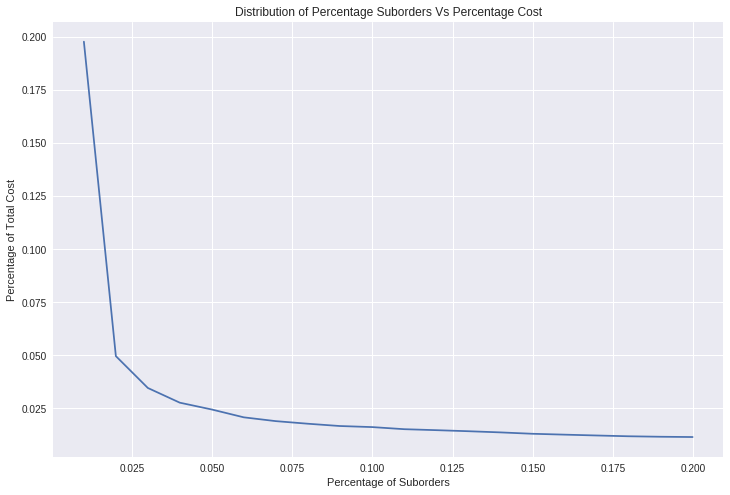

In [5]:
final_data = pd.DataFrame.from_dict(obj, orient='index').reset_index()
final_data.columns = ['num_suborders', 'total_cost']
final_data['num_suborders'] = final_data['num_suborders']/float(sum(data['num_suborders']))
final_data['total_cost'] = final_data['total_cost']/float(sum(data['total_cost']))
final_data = final_data.sort_values('num_suborders')
final_data.reset_index(inplace=True)
final_data.drop("index", axis=1, inplace=True)

tc_li = [0]
ns_li=[0]
for i in range(1,final_data.shape[0]):
    tc_li.append(final_data.iloc[i]['total_cost']-final_data.iloc[i-1]['total_cost'])
    ns_li.append(final_data.iloc[i]['num_suborders']-final_data.iloc[i-1]['num_suborders'])

plt.figure(figsize=(12,8))
plt.plot(final_data['num_suborders'].tolist()[1:], tc_li[1:])
plt.xlabel('Percentage of Suborders')
plt.ylabel('Percentage of Total Cost')
plt.title("Distribution of Percentage Suborders Vs Percentage Cost")
plt.savefig("Distribution of Percentage Suborders Vs Percentage Cost.png")
plt.show()

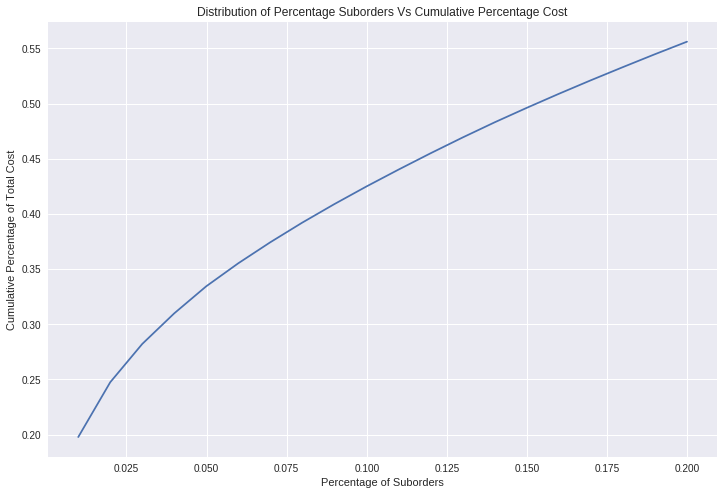

In [6]:
plt.figure(figsize=(12,8))
plt.plot(final_data['num_suborders'].tolist()[1:], final_data['total_cost'].tolist()[1:])
plt.xlabel('Percentage of Suborders')
plt.ylabel('Cumulative Percentage of Total Cost')
plt.title("Distribution of Percentage Suborders Vs Cumulative Percentage Cost")
plt.savefig("Distribution of Percentage Suborders Vs Cumulative Percentage Cost.png")
plt.show()

In [7]:
data.shape

(3000, 14)

In [8]:
len(items[0])

3001

# Visualizations

In [9]:
data.head()

,Unnamed: 0,subcategory_name,category_name,new_supercategory,Dest_tier,shipping_mode,payment_mode,FM,courier_group,Lane_type,num_suborders,rpr_freight,rpr_seller_comp,total_cost
0,1,Academic and Professional,Books,Books,EAST,Air,COD,DROPSHIP,ECOMM_EXP,ROI,1,100.0,5.598230,105.60
1,2,Academic and Professional,Books,Books,EAST,Air,COD,OCPLUS,LINE_HAUL_COURIER,ROI,1,100.0,1.704357,101.70
2,3,Academic and Professional,Books,Books,EAST,Air,COD,OCPLUS,VULCAN,ROI,2,211.0,16.279000,227.28
3,4,Academic and Professional,Books,Books,EAST,Air,STD,OCPLUS,LINE_HAUL_COURIER,ROI,1,100.0,1.704357,101.70
4,5,Academic and Professional,Books,Books,METRO,Air,COD,DROPSHIP,VULCAN,Same City,1,93.6,8.266195,101.87


In [17]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [13]:
threshold=0.2

In [14]:
key = int(data['num_suborders'].sum()*threshold)

In [15]:
key

1102

In [16]:
W

1102

In [20]:
len(items[key][1:])

3000

In [17]:
data["selected"]=items[key][1:]

In [22]:
data.head()

,Unnamed: 0,subcategory_name,category_name,new_supercategory,Dest_tier,shipping_mode,payment_mode,FM,courier_group,Lane_type,num_suborders,rpr_freight,rpr_seller_comp,total_cost,selected
0,1,Academic and Professional,Books,Books,EAST,Air,COD,DROPSHIP,ECOMM_EXP,ROI,1,100.0,5.598230,105.60,0
1,2,Academic and Professional,Books,Books,EAST,Air,COD,OCPLUS,LINE_HAUL_COURIER,ROI,1,100.0,1.704357,101.70,0
2,3,Academic and Professional,Books,Books,EAST,Air,COD,OCPLUS,VULCAN,ROI,2,211.0,16.279000,227.28,0
3,4,Academic and Professional,Books,Books,EAST,Air,STD,OCPLUS,LINE_HAUL_COURIER,ROI,1,100.0,1.704357,101.70,0
4,5,Academic and Professional,Books,Books,METRO,Air,COD,DROPSHIP,VULCAN,Same City,1,93.6,8.266195,101.87,0


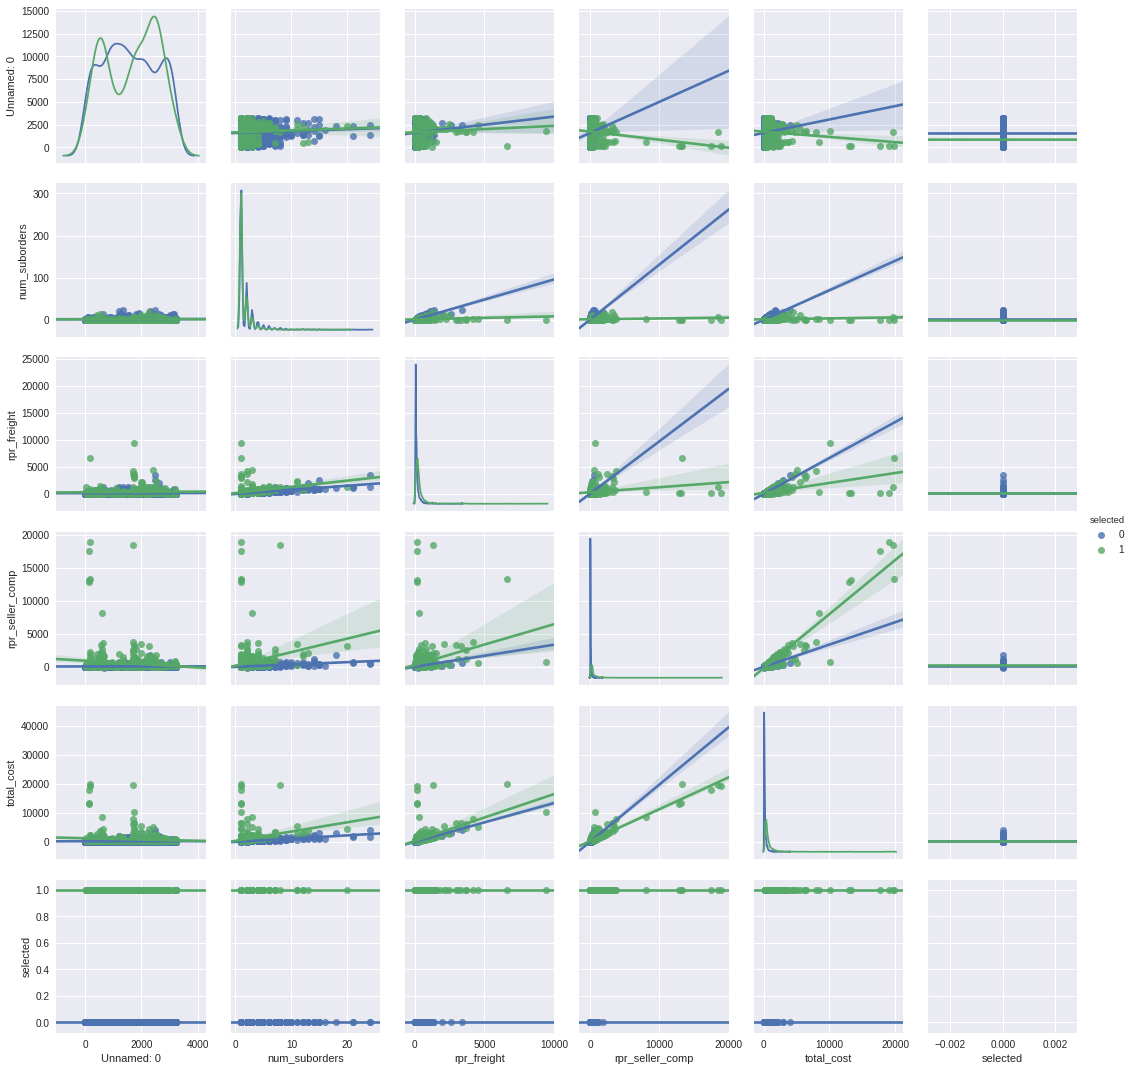

In [108]:
sns.pairplot(data, hue='selected', kind='reg', diag_kind='kde')

In [21]:
from collections import OrderedDict

In [33]:
data[[col, 'selected']]

,Lane_type,selected
0,ROI,0
1,ROI,0
2,ROI,0
3,ROI,0
4,Same City,0
5,Metro to Metro,0
6,Same City,0
7,Same City,0
8,Metro to Metro,0
9,Metro to Metro,0


In [46]:
order_df

,index,Lane_type
0,ROI,361
1,Same Zone,211
2,Metro to Metro,69
3,Same City,39


In [47]:
disp = data[col].value_counts().reset_index()

In [48]:
disp['threshold']=disp[col]*0.2

In [49]:
disp

,index,Lane_type,threshold
0,ROI,1692,338.4
1,Same Zone,800,160.0
2,Metro to Metro,348,69.6
3,Same City,160,32.0


In [50]:
fin_df = pd.merge(left=order_df, right=disp, on='index', how='left')

In [54]:
fin_df['threshold']

0    338.4
1    160.0
2     69.6
3     32.0
Name: threshold, dtype: float64

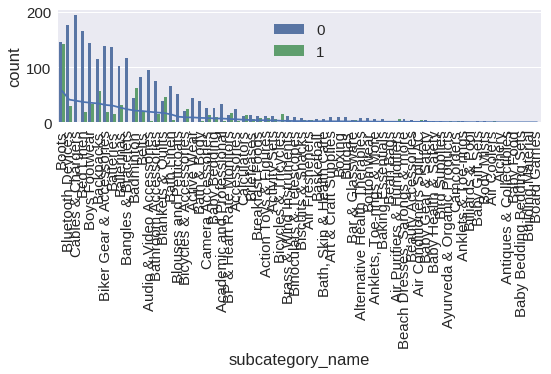

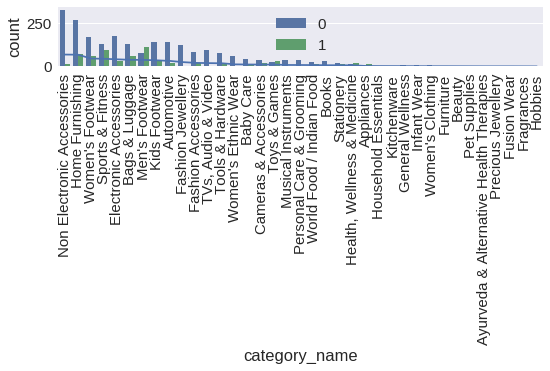

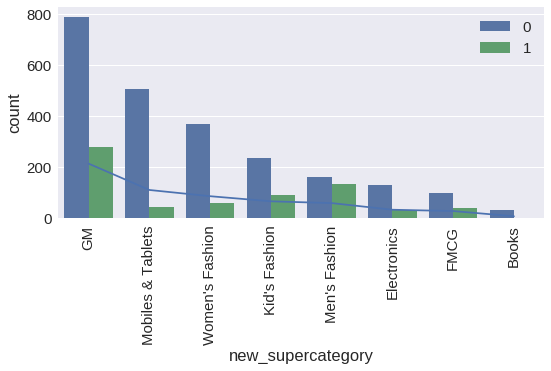

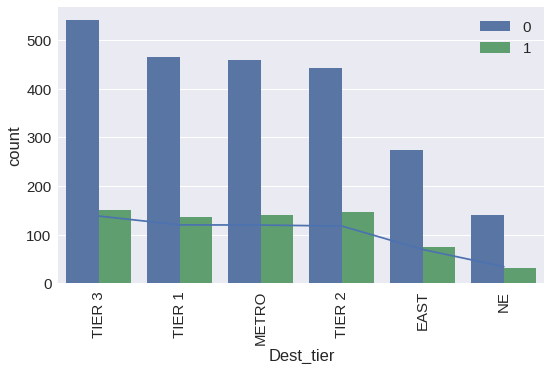

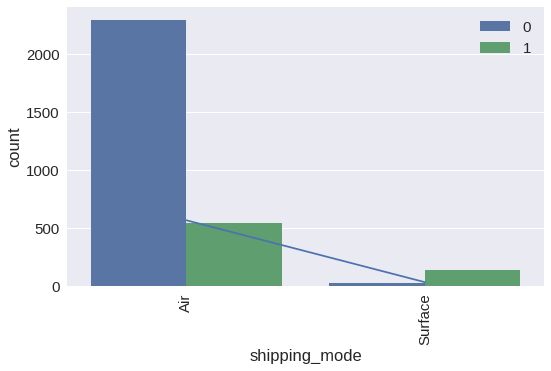

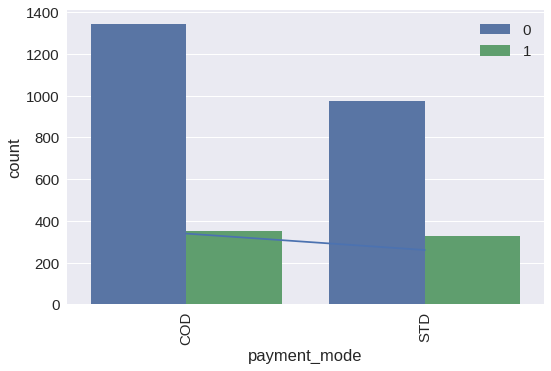

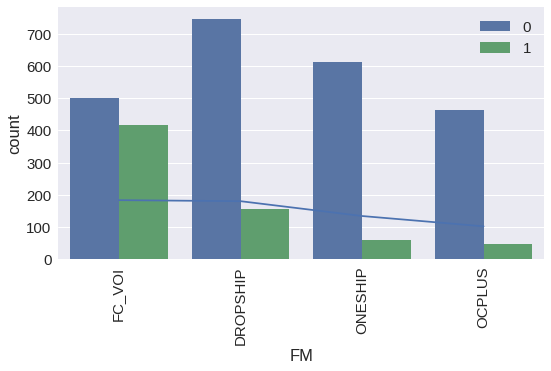

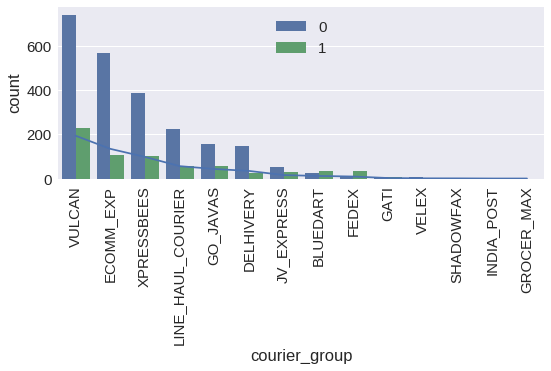

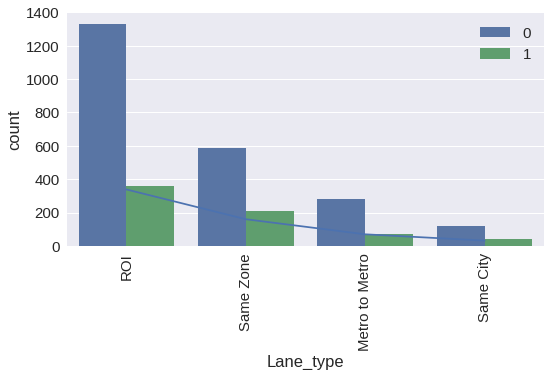

In [60]:
sns.set(font_scale=1.5)
for col in data.dtypes[data.dtypes==object].reset_index()['index']:
    #plt.figure(figsize=(16,16))
    #order = data[data['selected']==1][col].value_counts().reset_index()['index']
    #order_df = data[data['selected']==1][col].value_counts().reset_index()
    disp = data[col].value_counts().reset_index()
    disp['threshold']=disp[col]*0.2
    order =disp['index']
    #fin_df = pd.merge(left=order_df, right=disp, on='index', how='left')
    sns.color_palette("RdBu", n_colors=2, desat=.9)
    sns.countplot(hue='selected', data=data, x=col, order=order)
    plt.xticks(rotation=90)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.plot(disp['threshold'])
    
    plt.tight_layout()
    plt.show()
    #plt.savefig("./output/"+col+".png")
    #if (SHOW_PLOTS):
    #	plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

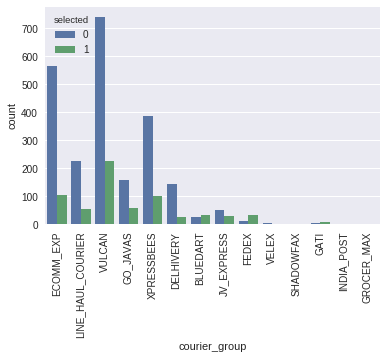

In [62]:
sns.countplot(hue='selected', data=data, x='courier_group')
plt.xticks(rotation=90)

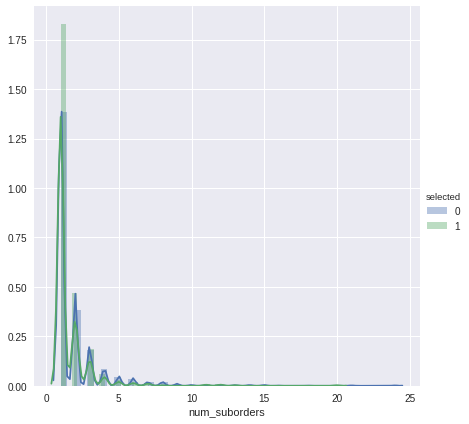

In [252]:
g=sns.FacetGrid(data, hue='selected', size=6)
g.map(sns.distplot, 'num_suborders').add_legend()
g.despine(left=True, bottom=True)



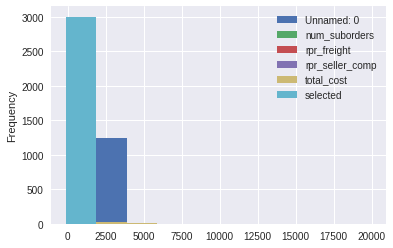

In [41]:
data.plot('subcategory_name', kind='hist')

In [66]:
data.groupby('selected')['FM'].value_counts().unstack().reset_index()

FM,selected,DROPSHIP,FC_VOI,OCPLUS,ONESHIP
0,0,746,500,463,611
1,1,155,417,48,60


In [229]:
bool(False)

False

In [70]:
data.head()

,Unnamed: 0,subcategory_name,category_name,new_supercategory,Dest_tier,shipping_mode,payment_mode,FM,courier_group,Lane_type,num_suborders,rpr_freight,rpr_seller_comp,total_cost,selected
0,1,Academic and Professional,Books,Books,EAST,Air,COD,DROPSHIP,ECOMM_EXP,ROI,1,100.0,5.598230,105.60,0
1,2,Academic and Professional,Books,Books,EAST,Air,COD,OCPLUS,LINE_HAUL_COURIER,ROI,1,100.0,1.704357,101.70,0
2,3,Academic and Professional,Books,Books,EAST,Air,COD,OCPLUS,VULCAN,ROI,2,211.0,16.279000,227.28,0
3,4,Academic and Professional,Books,Books,EAST,Air,STD,OCPLUS,LINE_HAUL_COURIER,ROI,1,100.0,1.704357,101.70,0
4,5,Academic and Professional,Books,Books,METRO,Air,COD,DROPSHIP,VULCAN,Same City,1,93.6,8.266195,101.87,0


In [200]:
from sklearn import tree

In [213]:
clf = tree.DecisionTreeClassifier(max_depth=2)

In [214]:
X=pd.get_dummies(data.drop(['selected', 'total_cost', 'num_suborders'], axis=1))

In [215]:
X.head()

,Unnamed: 0,rpr_freight,rpr_seller_comp,subcategory_name_Academic and Professional,subcategory_name_Accessories,subcategory_name_Action Toys & Figures,subcategory_name_Active Wear,subcategory_name_Activity Sets,subcategory_name_Air Conditioners Split AC,subcategory_name_Air Coolers,...,courier_group_JV_EXPRESS,courier_group_LINE_HAUL_COURIER,courier_group_SHADOWFAX,courier_group_VELEX,courier_group_VULCAN,courier_group_XPRESSBEES,Lane_type_Metro to Metro,Lane_type_ROI,Lane_type_Same City,Lane_type_Same Zone
0,1,100.0,5.598230,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,100.0,1.704357,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,211.0,16.279000,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,4,100.0,1.704357,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5,93.6,8.266195,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [217]:
clf.fit(X, data['selected'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [222]:
columns = [element.replace('&','') for element in X.columns]

In [223]:
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=columns,
                                class_names=['Unselected','Selected'],
                         filled=True, rounded=True,  
                         special_characters=True)  


In [224]:
import pydotplus

In [225]:
graph.write_pdf("test.pdf")

True

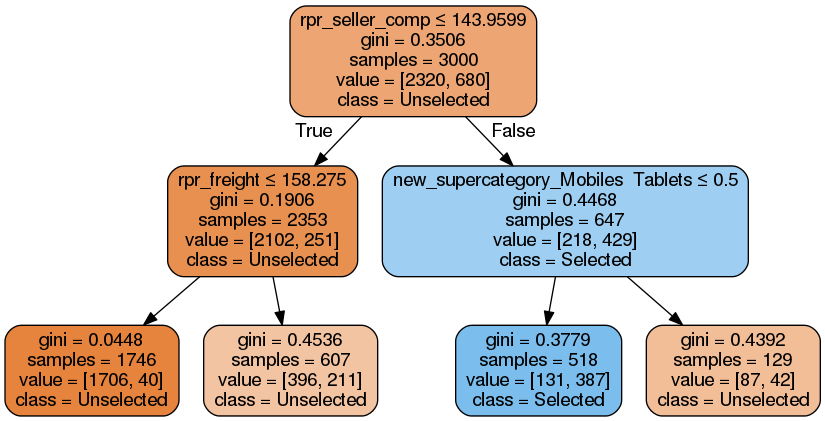

In [226]:
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [49]:
test=data['subcategory_name'].value_counts().reset_index()

In [50]:
test.head()

,index,subcategory_name
0,Boots,286
1,Bluetooth Devices,206
2,Cables & Chargers,195
3,Bed Linen,184
4,Boys Footwear,177


In [ ]:
g=sns.FacetGrid(data, row='rpr_freight')

In [230]:
f = open("/home/chalam/Desktop/Data Club/Automated Optimization/config/Parameters").read()


In [231]:
print (f)

Value to be maximized (column1)=total_cost
Weight to be minimized (column2)=num_suborders
Percentage of column2 to be considered (0-1)=0.2
Decision tree depth=6
Show plots on the go=False



In [95]:
f.split('\n')[0].split("=")[1]

'total_cost'

In [96]:
f.split('\n')[1].split("=")[1]

'num_suborders'

In [104]:
float(f.split('\n')[2].split("=")[1])

0.2

In [103]:
'0.2'

'0.2'

In [179]:
int(f.split('\n')[3].split("=")[1])

4

In [232]:
t=bool(f.split('\n')[4].split("=")[1])

In [233]:
t

True

In [239]:
f.split('\n')[4].split("=")[1]

'False'

In [ ]:
plt.

In [199]:
if t:
    print ("yes")

yes
